# Final Project  

## Customer Segmentation using KMeans Clustering

output : a plot of segmented bank customers

overview : because the bank want to make a new campaign, I want to segment customers to help digital marketing team to make right campaign 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('bank.csv')
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 1. Data Preprocessing 

#### Checking data info 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### Checking Missing Value

In [4]:
raw_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# no missing value 

#### Checking duplicate value

In [6]:
raw_data[raw_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [7]:
# no duplicated value

In [8]:
# because the data is clean we can conclude that data = raw_data
data = raw_data

#### Defining Numerical & Categorical Columns 

In [9]:
# define numerical value as "numeric"
numeric = data.loc[:, (data.dtypes == 'int64')].columns.tolist()
numeric

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
# define categorical data as 'categoric'
categoric = data.loc[:, (data.dtypes != 'int64') & (data.dtypes != 'float64')].columns.tolist()
categoric

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [11]:
# Analyzing statistical summary (numerical data)
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
# Analyzing ststistical summary (categorical data)
data.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## 3. EDA

#### Univariate Analysis

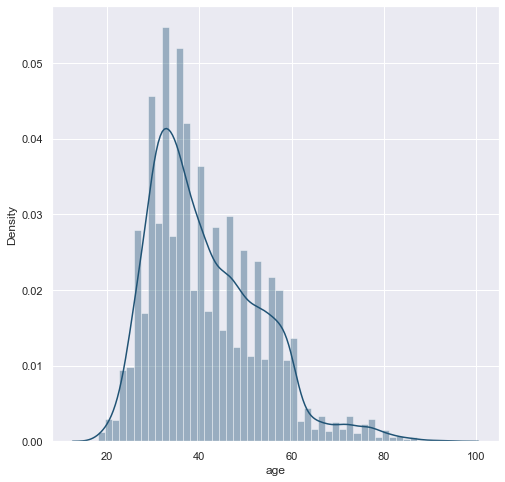

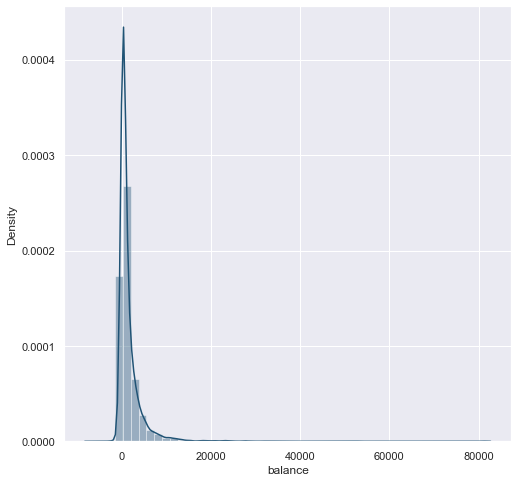

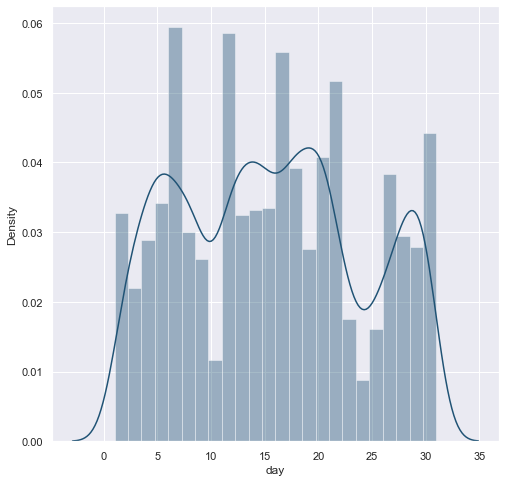

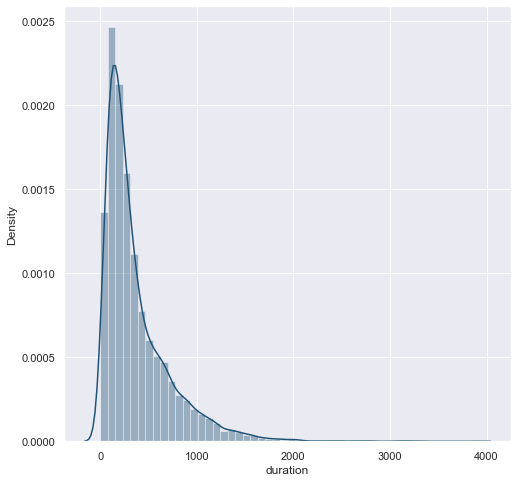

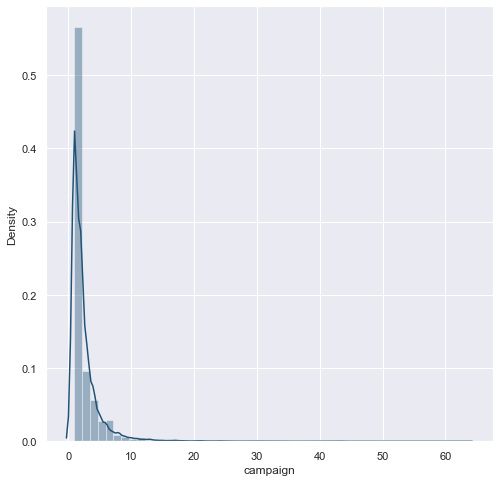

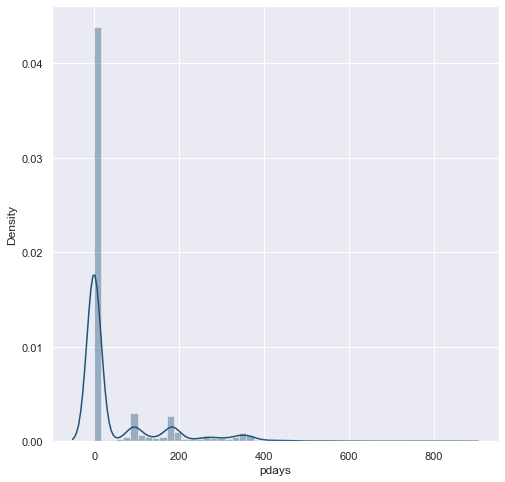

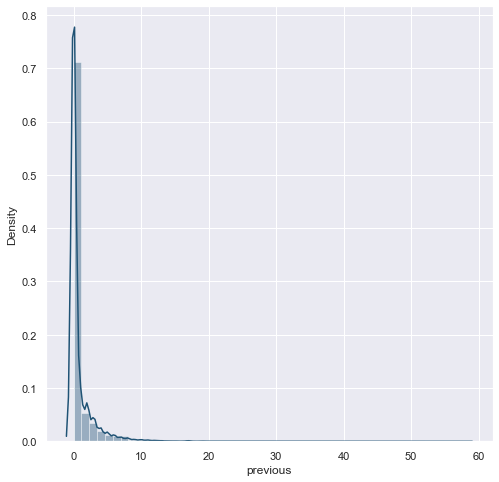

In [13]:
# plotting histogram for numerical data 
for i in range (0, len(numeric)):
    plt.figure(figsize=(8,8))
    sns.distplot(data[numeric[i]], color='#205375')

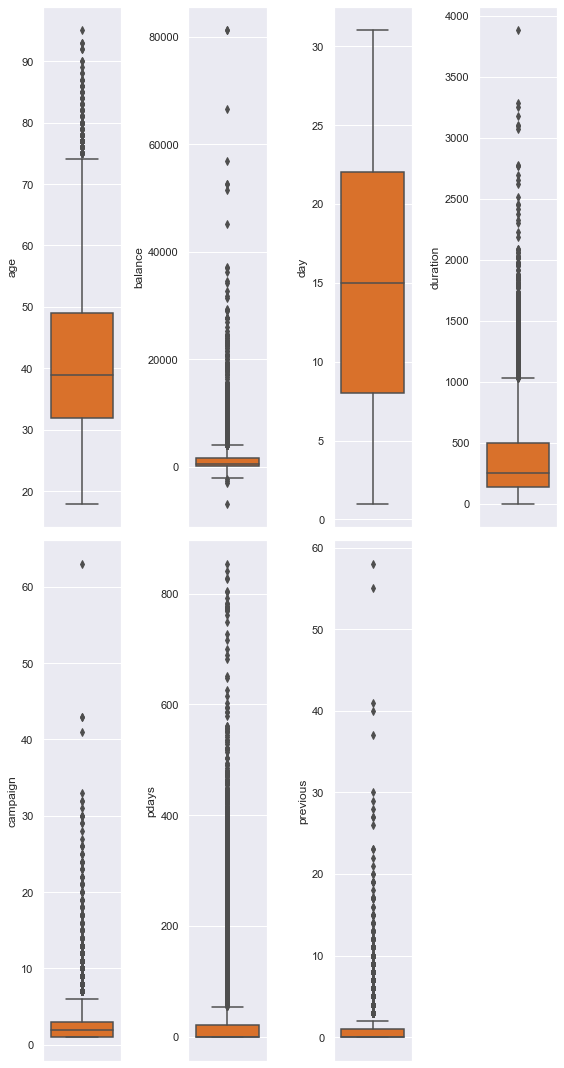

In [14]:
# Plotting boxplot for numerical data 
plt.figure(figsize=(8,15))
for i in range (0, len(numeric)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=data[numeric[i]], color='#F66B0E', orient='v')
    plt.tight_layout()

Univariate Analysis Observation: 
- From Boxplot and histogram we can see that there are a lot of outliers, so I decided to handles the outlier later below 

#### Multivariate Anlysis

<AxesSubplot:>

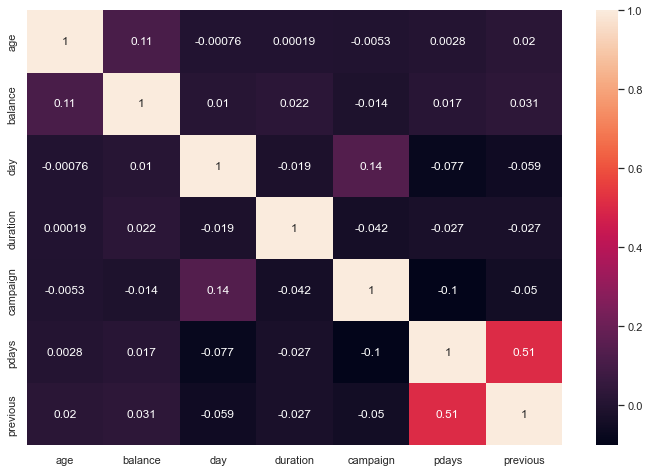

In [15]:
# plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[numeric].corr(), annot=True)

Multivariate Analysis Observation: 
- Theres no high corelated data (corr > 0,8)
- The highest corelated data is between 'pdays' and 'previous'
- don't have to deal with multicolinearity

#### Categorical Data Visualization

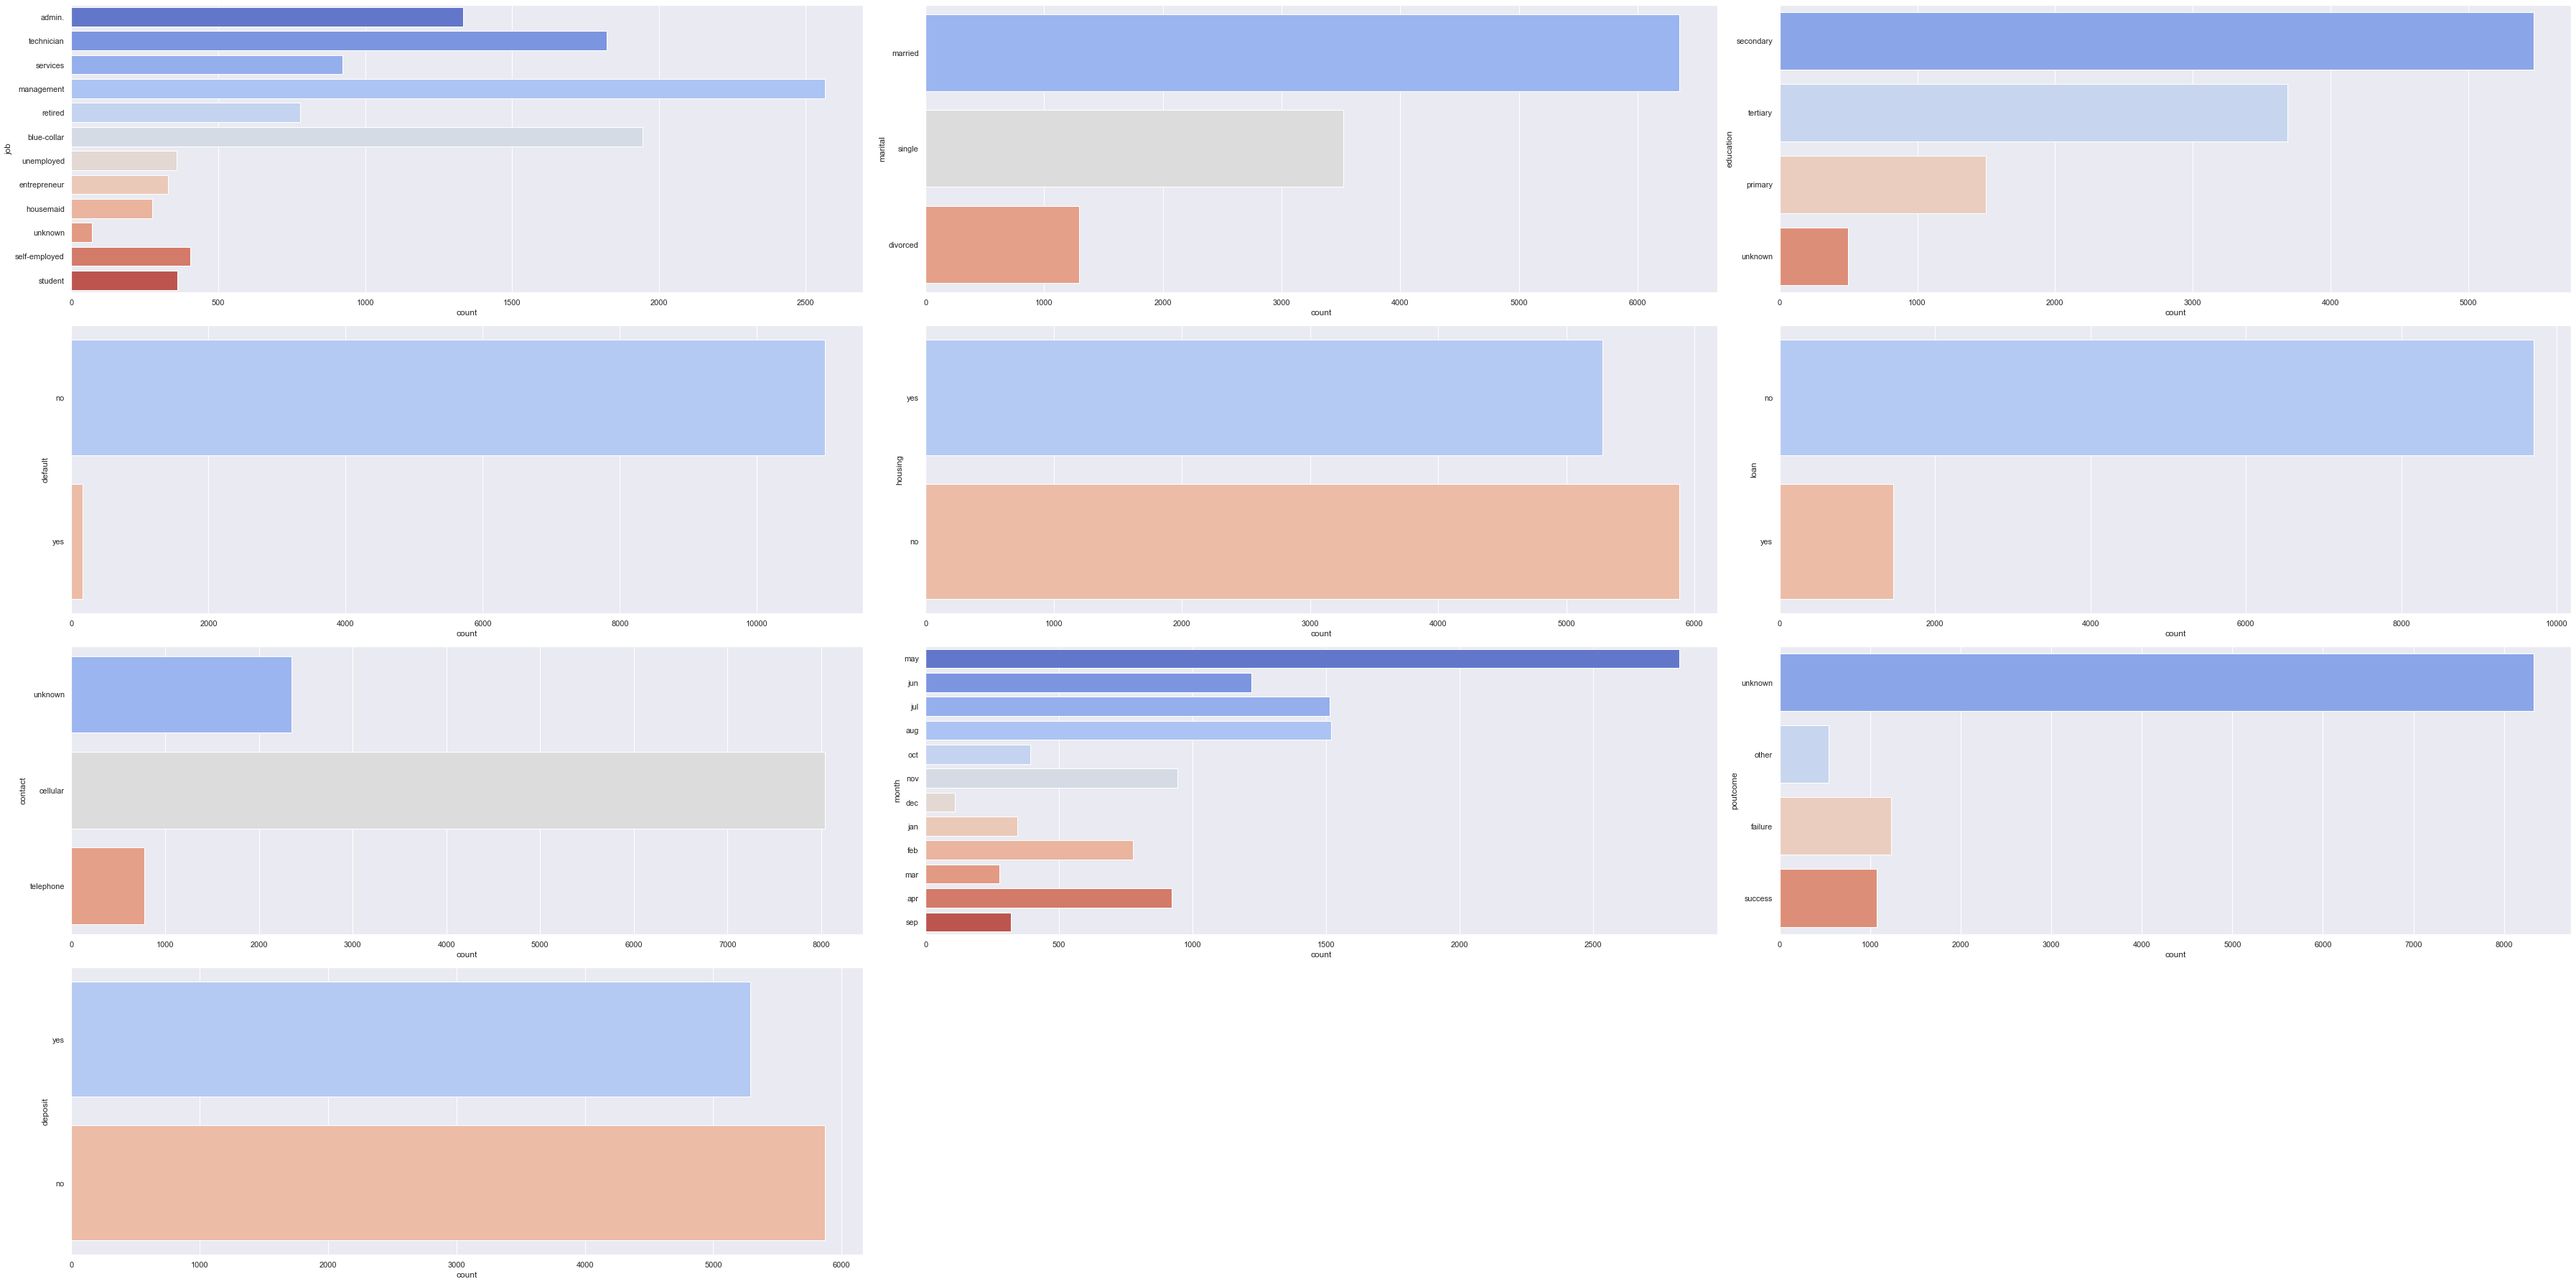

In [16]:
# countplot on categorical data 
plt.figure(figsize=(50,25))
for i in range (0, len(categoric)):
    plt.subplot(4, 3, i+1)
    sns.countplot(y = data[categoric[i]].sort_index(ascending=True), palette='coolwarm')
    plt.tight_layout()

#### Dealing with outliers

In [17]:
# find the maximum value using IQR for (duration)
maximum_dur = 498 + 1.5*(498-138)
data.drop(data[data.duration > maximum_dur].index,inplace=True)
# find the maximum value using IQR for ()

In [18]:
# Find the max value using iqr for (balance)
maximum_bal = 1708 + 1.5*(1708-122)

# splitting data into high and average balanced customer 
high_balanced = data[data['balance']>maximum_bal]
high_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 60 to 11101
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        984 non-null    int64 
 1   job        984 non-null    object
 2   marital    984 non-null    object
 3   education  984 non-null    object
 4   default    984 non-null    object
 5   balance    984 non-null    int64 
 6   housing    984 non-null    object
 7   loan       984 non-null    object
 8   contact    984 non-null    object
 9   day        984 non-null    int64 
 10  month      984 non-null    object
 11  duration   984 non-null    int64 
 12  campaign   984 non-null    int64 
 13  pdays      984 non-null    int64 
 14  previous   984 non-null    int64 
 15  poutcome   984 non-null    object
 16  deposit    984 non-null    object
dtypes: int64(7), object(10)
memory usage: 138.4+ KB


In [19]:
avg_balanced = data[data['balance']<= maximum_bal]
avg_balanced = avg_balanced[avg_balanced['balance'] > 0]
avg_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8174 entries, 3 to 11159
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8174 non-null   int64 
 1   job        8174 non-null   object
 2   marital    8174 non-null   object
 3   education  8174 non-null   object
 4   default    8174 non-null   object
 5   balance    8174 non-null   int64 
 6   housing    8174 non-null   object
 7   loan       8174 non-null   object
 8   contact    8174 non-null   object
 9   day        8174 non-null   int64 
 10  month      8174 non-null   object
 11  duration   8174 non-null   int64 
 12  campaign   8174 non-null   int64 
 13  pdays      8174 non-null   int64 
 14  previous   8174 non-null   int64 
 15  poutcome   8174 non-null   object
 16  deposit    8174 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


a. Re-checking the distribution

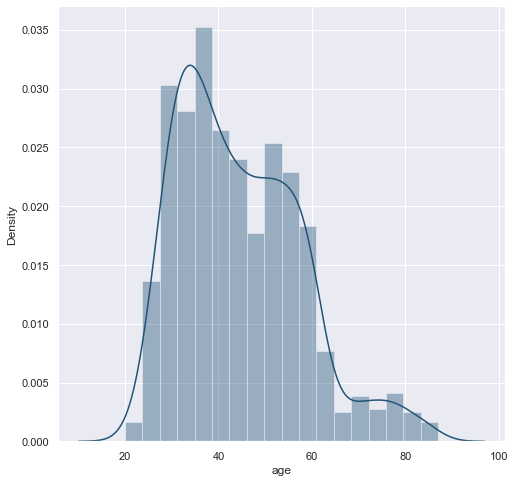

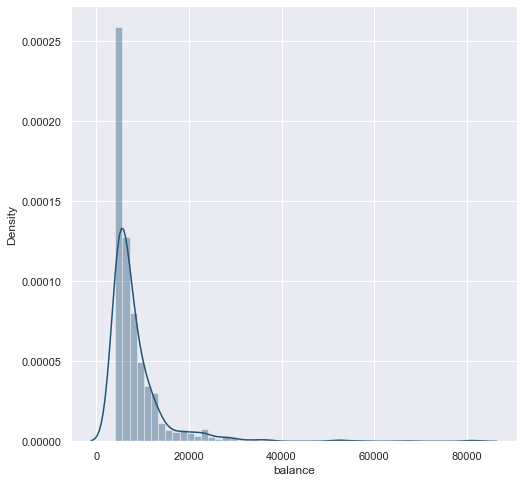

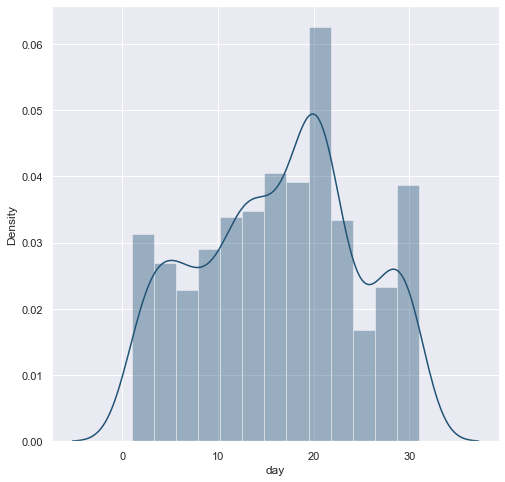

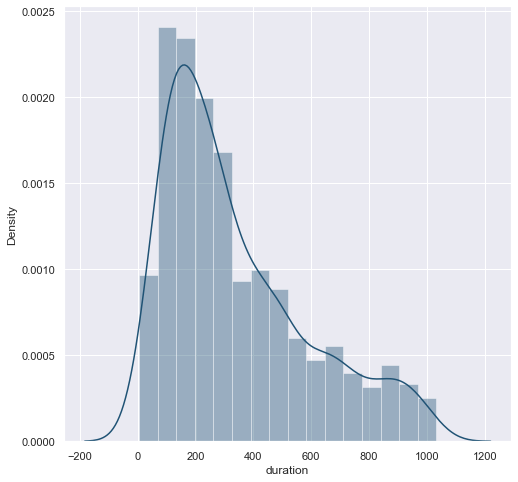

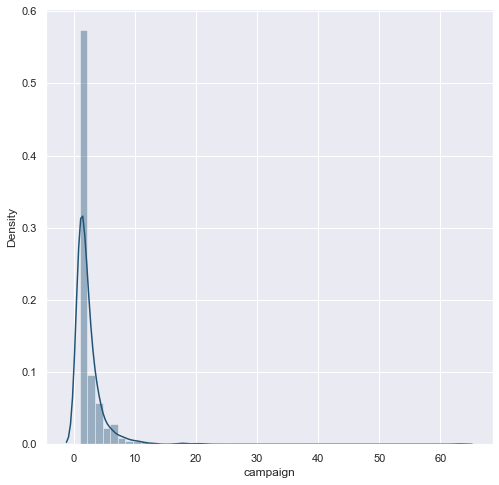

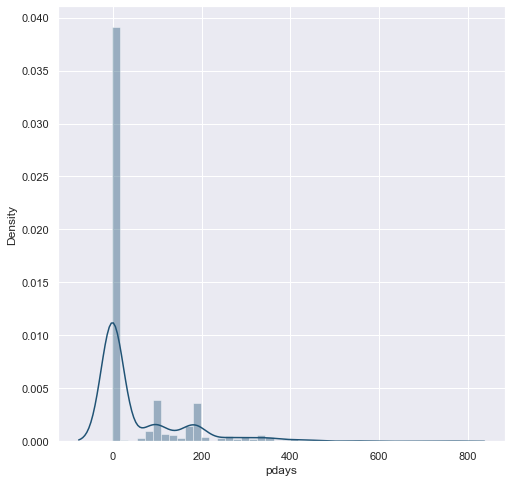

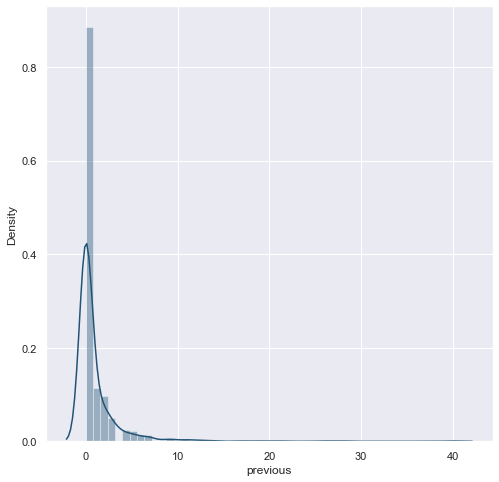

In [20]:
# high_balanced data 
for i in range (0, len(numeric)):
    plt.figure(figsize=(8,8))
    sns.distplot(high_balanced[numeric[i]], color='#205375')

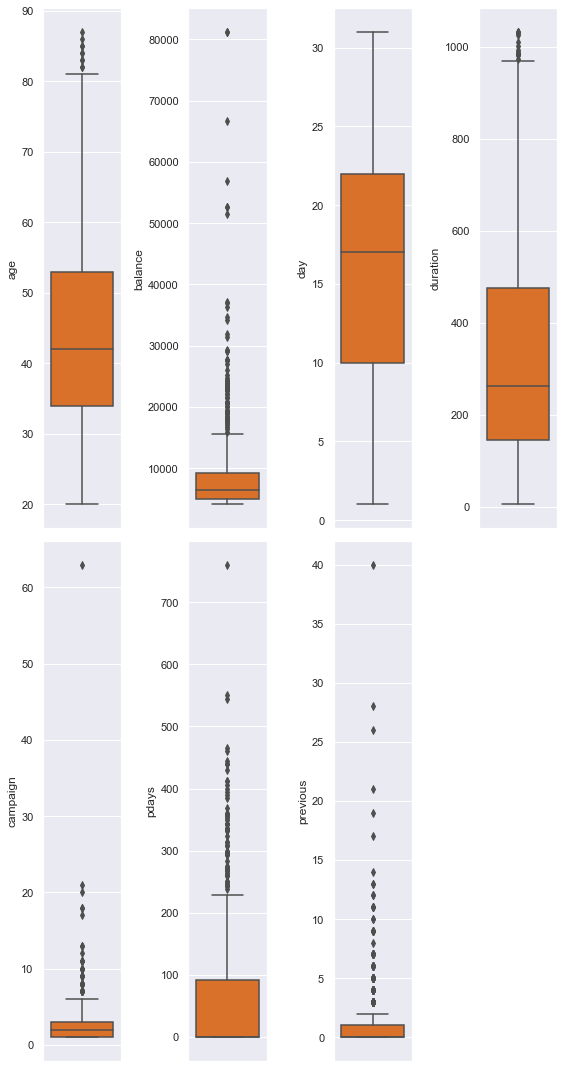

In [21]:
plt.figure(figsize=(8,15))
for i in range (0, len(numeric)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=high_balanced[numeric[i]], color='#F66B0E', orient='v')
    plt.tight_layout()

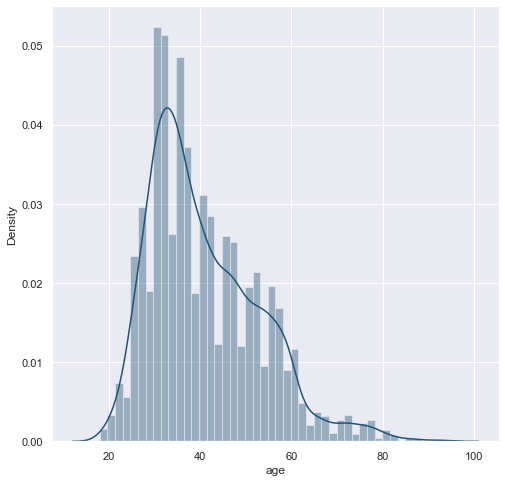

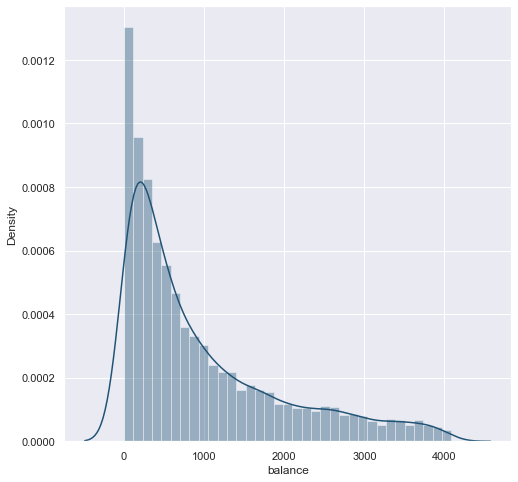

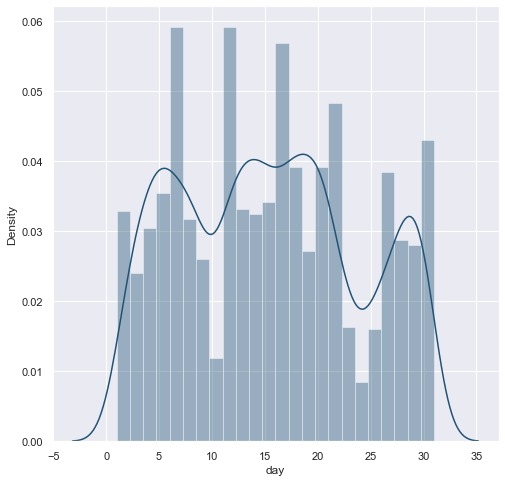

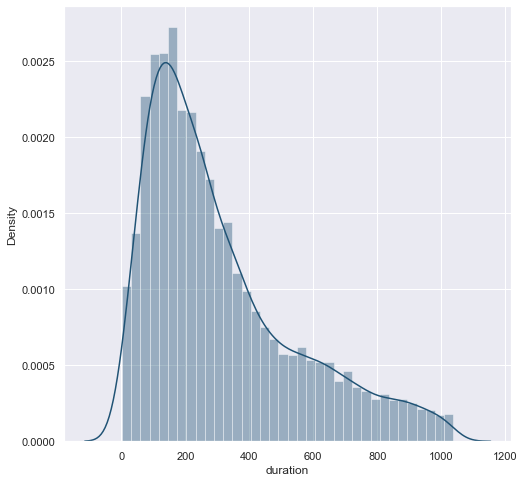

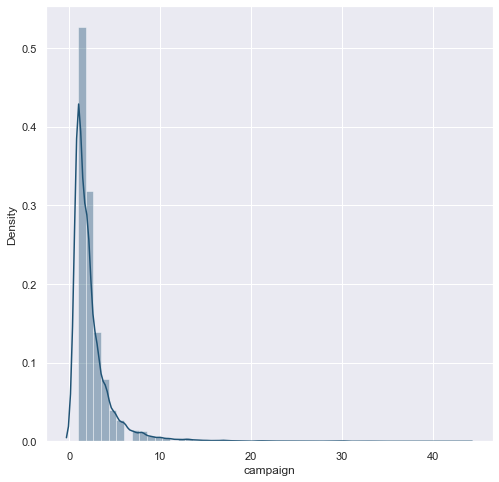

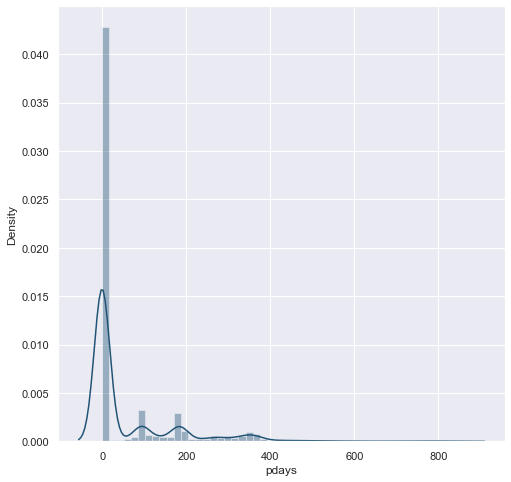

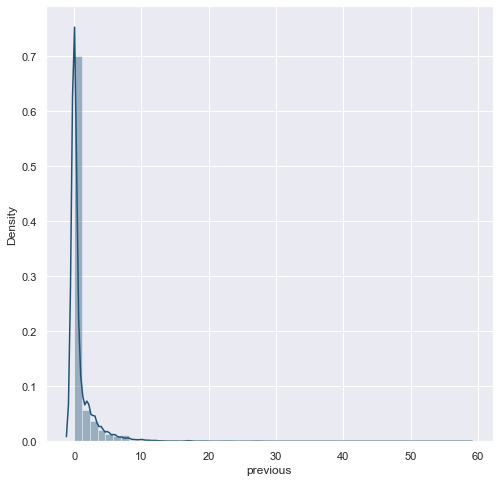

In [22]:
# avg_balanced data 
for i in range (0, len(numeric)):
    plt.figure(figsize=(8,8))
    sns.distplot(avg_balanced[numeric[i]], color='#205375')

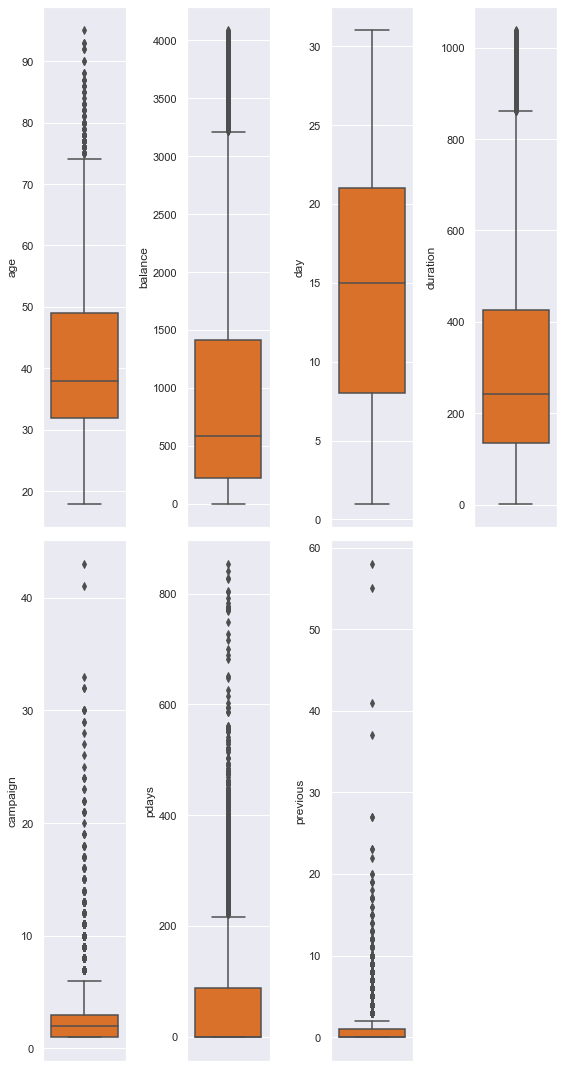

In [23]:
plt.figure(figsize=(8,15))
for i in range (0, len(numeric)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=avg_balanced[numeric[i]], color='#F66B0E', orient='v')
    plt.tight_layout()

### 5. Normalization

In [24]:
 # Defining feature 
feature = ['age','balance','duration']

In [25]:
# Doing normalization to 'balance' and 'duration' feature data have positive skew
# Doing standardization to 'age' feature because the distribution near normal 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# high_balanced data 
high_balanced['age_normalized'] = StandardScaler().fit_transform(high_balanced['age'].values.reshape(len(high_balanced[feature]), 1))
high_balanced['balance_normalized'] = MinMaxScaler().fit_transform(high_balanced['balance'].values.reshape(len(high_balanced[feature]), 1))
high_balanced['duration_normalized'] = MinMaxScaler().fit_transform(high_balanced['duration'].values.reshape(len(high_balanced[feature]), 1))

high_balanced_normed = high_balanced[['age_normalized','balance_normalized','duration_normalized']]
high_balanced_normed

,age_normalized,balance_normalized,duration_normalized
60,0.501092,0.040083,0.897760
69,-0.034111,0.006367,0.882181
98,-0.645771,0.004526,0.429406
108,-0.722229,0.009505,0.815969
121,-0.951601,0.007469,0.832522
...,...,...,...
11073,-0.798686,0.034092,0.265823
11077,0.730465,0.026104,0.078870
11085,1.189210,0.001997,0.371957
11086,-0.187026,0.030552,0.014606


In [26]:
# avg_balanced data
avg_balanced['age_normalized'] = StandardScaler().fit_transform(avg_balanced['age'].values.reshape(len(avg_balanced[feature]), 1))
avg_balanced['balance_normalized'] = MinMaxScaler().fit_transform(avg_balanced['balance'].values.reshape(len(avg_balanced[feature]), 1))
avg_balanced['duration_normalized'] = MinMaxScaler().fit_transform(avg_balanced['duration'].values.reshape(len(avg_balanced[feature]), 1))

avg_balanced_normed = avg_balanced[['age_normalized','balance_normalized','duration_normalized']]
avg_balanced_normed


,age_normalized,balance_normalized,duration_normalized
3,1.173046,0.605727,0.556950
4,1.089882,0.044787,0.647683
7,1.588866,0.133138,0.992278
8,-0.323906,0.000000,0.584942
10,-0.240742,0.024229,0.756757
...,...,...,...
11154,0.923554,0.127753,0.107143
11155,-0.490234,0.019334,0.034749
11157,-0.656562,0.000000,0.246139
11158,-0.157578,0.179148,0.078185


### 6. Clustering Using K-Means

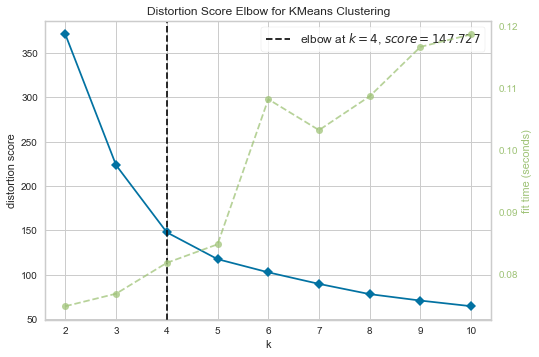

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# visualizing Distortion for high_balanced
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

elbow_high_bal = KElbowVisualizer(KMeans(), k = 10)
elbow_high_bal.fit(high_balanced_normed)
elbow_high_bal.show()

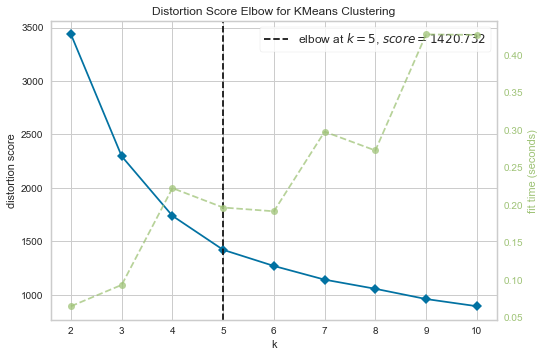

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Visualizing Distortion for avg_balanced 
elbow_avg_bal = KElbowVisualizer(KMeans(), k = 10)
elbow_avg_bal.fit(avg_balanced_normed)
elbow_avg_bal.show()

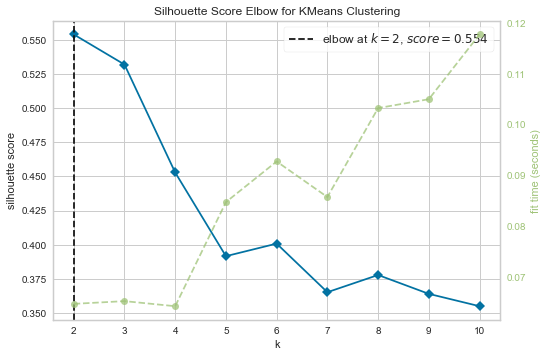

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
# Visualizing Silhouette for high_balanced
sil_high_bal = KElbowVisualizer(KMeans(), k = 10, metric='silhouette')
sil_high_bal.fit(high_balanced_normed)
sil_high_bal.show()

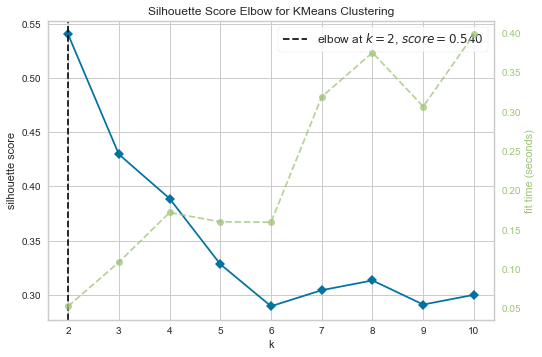

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
# Visualizing Silhouette for high_balanced
sil_avg_bal = KElbowVisualizer(KMeans(), k = 10, metric='silhouette')
sil_avg_bal.fit(avg_balanced_normed)
sil_avg_bal.show()

#### a. Distortion Method

1. High_balanced Data 

In [31]:
# Drop Normed Columns 
high_balanced = high_balanced.drop(['age_normalized','balance_normalized','duration_normalized'], axis=1)

In [32]:
# create clusters
kmeans_high_elb = KMeans(n_clusters=4, random_state=0).fit(high_balanced_normed)
clusters_high_elb = kmeans_high_elb.labels_
high_balanced['Clusters'] = clusters_high_elb
high_balanced.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clusters
3144,78,retired,married,unknown,no,4807,no,no,telephone,3,feb,892,2,104,4,success,yes,1
6914,42,blue-collar,married,primary,no,7735,yes,no,cellular,13,apr,166,1,144,2,failure,no,0
6662,49,technician,married,secondary,no,12531,no,no,cellular,13,aug,77,8,-1,0,unknown,no,0
1062,31,management,married,tertiary,no,4148,yes,no,cellular,21,nov,316,3,99,9,other,yes,2
2459,34,technician,married,tertiary,no,7050,no,no,cellular,7,aug,130,1,-1,0,unknown,yes,2
8706,41,entrepreneur,single,primary,no,7264,no,yes,unknown,1,jul,125,3,-1,0,unknown,no,0
3714,41,technician,single,secondary,no,5329,no,no,cellular,14,jul,397,2,-1,0,unknown,yes,0
2339,57,management,married,tertiary,no,10583,no,no,cellular,22,jun,295,3,-1,0,unknown,yes,3
3769,61,self-employed,married,tertiary,no,10861,no,no,cellular,26,jul,336,2,259,3,success,yes,3
5223,51,self-employed,married,tertiary,no,5350,yes,yes,cellular,31,jul,612,4,-1,0,unknown,yes,3


Cluster Anlysis high_balanced

In [33]:
# to ease visualization process, reduce dimentions are needed (2 PCA)
from sklearn.decomposition import PCA
pca_high_elb = PCA(n_components=2)
pca_high_elb.fit(high_balanced_normed)
pcs_high_elb = pca_high_elb.transform(high_balanced_normed)

reducted_high_elb = pd.DataFrame(data = pcs_high_elb, columns=['PC 1','PC 2'])
reducted_high_elb

,PC 1,PC 2
0,0.507024,0.567302
1,-0.028602,0.557921
2,-0.645071,0.111725
3,-0.717332,0.498945
4,-0.946523,0.517953
...,...,...
979,-0.799454,-0.050684
980,0.727469,-0.253640
981,1.189089,0.034928
982,-0.190579,-0.308265


In [34]:
# Adding clusters to 'reducted_high_elb'
reducted_high_elb['Clusters'] = clusters_high_elb
reducted_high_elb.head()

,PC 1,PC 2,Clusters
0,0.507024,0.567302,3
1,-0.028602,0.557921,0
2,-0.645071,0.111725,2
3,-0.717332,0.498945,2
4,-0.946523,0.517953,2


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

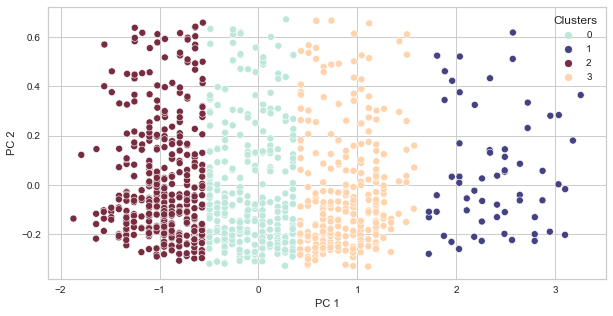

In [35]:
# Visualize reducted
plt.figure(figsize=(10,5))
sns.scatterplot(x='PC 1', y='PC 2', data=reducted_high_elb, hue='Clusters', palette='icefire')

In [36]:
# based on feature clsuter 
high_balanced[['age','balance','duration','Clusters']].groupby('Clusters').median()

,age,balance,duration
Clusters,,,
0,43.0,6200.0,252.0
1,75.5,6480.0,379.5
2,32.0,6397.0,267.0
3,56.0,6468.0,251.0


In [37]:
# total_customer for every cluster
high_balanced['Clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "Clusters", "Clusters": "total_customers"})

,Clusters,total_customers
0,2,368
1,0,281
2,3,275
3,1,60


In [38]:
# create feature vsriables for grouping
feat_gr = ['age','job','marital','education','balance','duration','Clusters']
# Grouping Clusters based on 'job', 'marital', 'education'
groups_high_bal = high_balanced[feat_gr].groupby(['Clusters', 'job', 'marital', 'education']).agg(['median','sum']).round()
groups_high_bal['pct_total'] = (groups_high_bal['balance']['sum'] / groups_high_bal['balance']['sum'].sum()).round(3)*100

In [39]:
top_high_bal = groups_high_bal.sort_values(by='pct_total', ascending=False)
top_high_bal.head(5)

age       balance         duration  \
                                      median   sum  median     sum   median   
Clusters job        marital education                                         
2        management single  tertiary    31.0  2190  7506.0  646351    324.0   
0        management married tertiary    44.0  1717  7177.0  452931    269.0   
3        management married tertiary    55.0  2387  7067.0  407999    250.0   
2        management married tertiary    33.0  1334  6472.0  312910    292.0   
1        retired    married secondary   77.0  1067  8304.0  275106    408.0   

                                             pct_total  
                                         sum            
Clusters job        marital education                   
2        management single  tertiary   26156       7.7  
0        management married tertiary   12345       5.4  
3        management married tertiary   14228       4.9  
2        management married tertiary   12910       3.8  
1        retired    married secondary   6016       3.3

2. avg_balanced data 

In [40]:
# Create Clusters
kmeans_avg_elb = KMeans(n_clusters=4, random_state=0).fit(avg_balanced_normed)
clusters_avg_elb = kmeans_avg_elb.labels_
avg_balanced['Clusters'] = clusters_avg_elb
avg_balanced.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_normalized,balance_normalized,duration_normalized,Clusters
4113,34,admin.,single,secondary,no,557,no,no,cellular,17,...,224,1,-1,0,unknown,yes,-0.573398,0.136074,0.214286,1
4053,34,technician,married,secondary,no,159,yes,no,cellular,18,...,252,1,-1,0,unknown,yes,-0.573398,0.038669,0.241313,1
10041,37,blue-collar,married,secondary,no,168,yes,no,cellular,17,...,266,2,-1,0,unknown,no,-0.323906,0.040871,0.254826,0
684,39,management,married,tertiary,no,1836,no,no,cellular,6,...,902,3,-1,0,unknown,yes,-0.157578,0.449094,0.868726,0
3357,60,admin.,married,secondary,no,3735,no,no,cellular,22,...,248,1,90,10,success,yes,1.588866,0.913852,0.237452,3
3321,28,management,single,tertiary,no,1825,no,no,cellular,9,...,236,1,-1,0,unknown,yes,-1.072382,0.446402,0.225869,1
3439,40,technician,married,tertiary,no,206,no,no,cellular,23,...,499,6,185,4,success,yes,-0.074414,0.050171,0.479730,0
6904,42,blue-collar,married,secondary,no,351,yes,no,unknown,16,...,76,21,-1,0,unknown,no,0.091914,0.085658,0.071429,0
2689,73,retired,married,primary,no,934,no,no,cellular,14,...,961,5,-1,0,unknown,yes,2.669999,0.228341,0.925676,2
647,55,housemaid,divorced,primary,no,77,no,no,cellular,31,...,463,6,-1,0,unknown,yes,1.173046,0.018600,0.444981,3


Clusters Analysis avg_balanced

In [41]:
# to ease visualization process, reduce dimentions are needed (2 PCA)
pca_avg_elb = PCA(n_components=2)
pca_avg_elb.fit(avg_balanced_normed)
pcs_avg_elb = pca_avg_elb.transform(avg_balanced_normed)

reducted_avg_elb = pd.DataFrame(data = pcs_avg_elb, columns=['PC 1','PC 2'])
reducted_avg_elb.head()

,PC 1,PC 2
0,1.184823,0.388116
1,1.082396,-0.122364
2,1.583855,0.042028
3,-0.332049,-0.136536
4,-0.248233,-0.068176


In [42]:
# Adding clusters to 'reducted_avg_elb'
reducted_avg_elb['Clusters'] = clusters_avg_elb
reducted_avg_elb.head()

,PC 1,PC 2,Clusters
0,1.184823,0.388116,3
1,1.082396,-0.122364,3
2,1.583855,0.042028,3
3,-0.332049,-0.136536,0
4,-0.248233,-0.068176,0


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

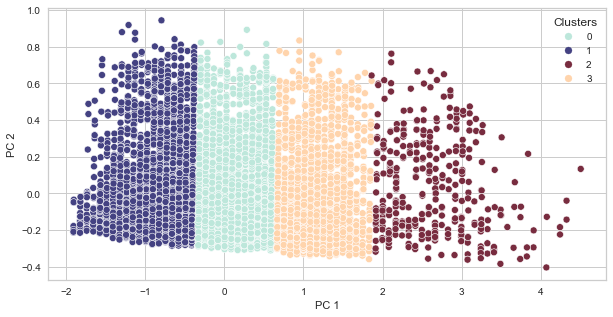

In [43]:
# Visualizing Cluster
plt.figure(figsize=(10,5))
sns.scatterplot(x='PC 1', y='PC 2', data=reducted_avg_elb, hue='Clusters', palette='icefire')

In [44]:
# based on feature clsuter 
avg_balanced[['age','balance','duration','Clusters']].groupby('Clusters').median()

,age,balance,duration
Clusters,,,
0,42.0,636.0,229.0
1,31.0,503.0,250.0
2,72.0,1287.0,301.0
3,54.0,653.5,225.5


In [45]:
# total_customer for every cluster
avg_balanced['Clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "Clusters", "Clusters": "total_customers"})

,Clusters,total_customers
0,1,3668
1,0,2447
2,3,1702
3,2,357


In [46]:
# Grouping Clusters based on 'job', 'marital', 'education'
groups_avg_bal = avg_balanced[feat_gr].groupby(['Clusters', 'job', 'marital', 'education']).agg(['median','sum']).round()
groups_avg_bal['pct_total'] = (groups_avg_bal['balance']['sum'] / groups_avg_bal['balance']['sum'].sum()).round(3)*100

In [47]:
top_avg_bal = groups_avg_bal.sort_values(by='pct_total', ascending=False)
top_avg_bal.head(5)

age        balance         duration  \
                                       median    sum  median     sum   median   
Clusters job         marital education                                          
1        management  single  tertiary    31.0  14309   630.0  478919    267.0   
0        management  married tertiary    42.0  12744   644.0  330107    238.0   
1        management  married tertiary    33.0   9868   584.0  274193    221.0   
3        management  married tertiary    54.0  11234   659.0  242268    230.0   
0        blue-collar married secondary   42.0   9854   710.0  234865    230.0   

                                               pct_total  
                                           sum            
Clusters job         marital education                    
1        management  single  tertiary   157108       6.1  
0        management  married tertiary    96055       4.2  
1        management  married tertiary    84829       3.5  
3        management  married tertiary    59148       3.1  
0        blue-collar married secondary   70873       3.0

Analysis KMeans using elbow method:
- Everything separated perfectly, in this method we have more cluster than the silhouette method
- More cluster allow us made more specific decision 

#### b. Silhouette Method 

1. High_balanced data

In [48]:
# Create Clusters 
kmeans_high_sil = KMeans(n_clusters=2, random_state=0).fit(high_balanced_normed)
clusters_high_sil = kmeans_high_sil.labels_
high_balanced['Clusters'] = clusters_high_sil
high_balanced.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clusters
1050,50,admin.,married,secondary,no,4117,no,no,cellular,21,nov,530,1,-1,0,unknown,yes,1
1268,29,management,single,tertiary,no,5359,no,no,cellular,18,feb,147,1,-1,0,unknown,yes,0
4415,57,management,divorced,tertiary,no,8897,yes,no,cellular,12,aug,865,2,-1,0,unknown,yes,1
2288,37,blue-collar,married,secondary,no,4321,no,no,cellular,5,jun,657,1,-1,0,unknown,yes,0
10839,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure,no,0
5052,61,self-employed,married,tertiary,no,10861,no,no,cellular,25,oct,225,1,91,5,success,yes,1
2199,40,unemployed,single,tertiary,no,7968,no,no,cellular,2,jun,596,1,-1,0,unknown,yes,0
2837,69,retired,divorced,secondary,no,4572,no,no,telephone,27,oct,146,2,56,1,other,yes,1
5092,42,management,married,tertiary,no,27696,no,no,cellular,12,may,176,2,89,5,success,yes,0
4266,35,management,single,tertiary,no,7918,no,no,cellular,7,sep,497,1,-1,0,unknown,yes,0


In [49]:
# Applying dimensionality reduction
pca_high_sil = PCA(n_components=2)
pca_high_sil.fit(high_balanced_normed)
pcs_high_sil = pca_high_sil.transform(high_balanced_normed)

reducted_high_sil = pd.DataFrame(data = pcs_high_sil, columns=['PC 1','PC 2'])
reducted_high_sil.head()

,PC 1,PC 2
0,0.507024,0.567302
1,-0.028602,0.557921
2,-0.645071,0.111725
3,-0.717332,0.498945
4,-0.946523,0.517953


In [50]:
# Adding Cluster 
reducted_high_sil['Clusters'] = clusters_high_sil
reducted_high_sil.head()

,PC 1,PC 2,Clusters
0,0.507024,0.567302,1
1,-0.028602,0.557921,0
2,-0.645071,0.111725,0
3,-0.717332,0.498945,0
4,-0.946523,0.517953,0


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

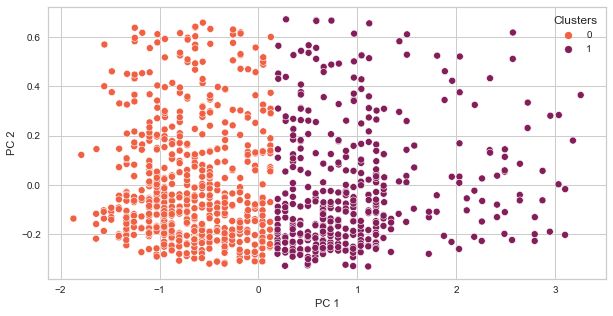

In [51]:
# Visualizing cluster
plt.figure(figsize=(10,5))
sns.scatterplot(x='PC 1', y='PC 2', data=reducted_high_sil, hue='Clusters', palette='rocket_r')

In [52]:
high_balanced[['age','balance','duration','Clusters']].groupby('Clusters').median()

,age,balance,duration
Clusters,,,
0,35.0,6402.5,265.0
1,56.0,6270.0,257.0


In [53]:
high_balanced['Clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "Clusters", "Clusters": "total_customer"})

,Clusters,total_customer
0,0,584
1,1,400


2. avg_balanced data

In [54]:
# create clusters
kmeans_avg_sil = KMeans(n_clusters=2, random_state=0).fit(avg_balanced_normed)
clusters_avg_sil = kmeans_avg_sil.labels_
avg_balanced['Clusters'] = clusters_avg_sil
avg_balanced.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_normalized,balance_normalized,duration_normalized,Clusters
1447,30,management,single,tertiary,no,2544,no,no,cellular,9,...,152,2,-1,0,unknown,yes,-0.906054,0.622369,0.144788,1
6389,35,blue-collar,married,secondary,no,2200,yes,no,cellular,17,...,14,1,-1,0,unknown,no,-0.490234,0.538179,0.011583,1
8523,35,management,married,tertiary,no,244,yes,no,cellular,19,...,138,1,-1,0,unknown,no,-0.490234,0.059471,0.131274,1
9710,60,technician,divorced,tertiary,no,1900,yes,no,unknown,29,...,77,3,-1,0,unknown,no,1.588866,0.464758,0.072394,0
10895,57,management,married,tertiary,no,350,no,no,telephone,4,...,87,3,-1,0,unknown,no,1.339374,0.085414,0.082046,0
3595,28,management,single,tertiary,no,187,no,no,cellular,9,...,206,1,92,1,success,yes,-1.072382,0.045521,0.196911,1
3881,48,unemployed,married,secondary,no,926,no,no,cellular,12,...,504,2,178,10,success,yes,0.590898,0.226383,0.484556,0
1161,29,management,married,tertiary,no,1441,yes,no,cellular,4,...,80,2,-1,0,unknown,yes,-0.989218,0.352423,0.075290,1
3172,60,technician,married,secondary,no,824,yes,no,cellular,9,...,127,1,558,7,other,yes,1.588866,0.201419,0.120656,0
9158,26,unemployed,married,secondary,no,285,yes,no,cellular,6,...,265,2,342,2,failure,no,-1.238711,0.069506,0.253861,1


In [55]:
# Applying dimensionality reduction
pca_avg_sil = PCA(n_components=2)
pca_avg_sil.fit(avg_balanced_normed)
pcs_avg_sil = pca_avg_sil.transform(avg_balanced_normed)

reducted_avg_sil = pd.DataFrame(data = pcs_avg_sil, columns=['PC 1','PC 2'])
reducted_avg_sil.head()

,PC 1,PC 2
0,1.184823,0.388116
1,1.082396,-0.122364
2,1.583855,0.042028
3,-0.332049,-0.136536
4,-0.248233,-0.068176


In [56]:
# Adding clusters to 'reducted_avg_sil'
reducted_avg_sil['Clusters'] = clusters_avg_sil
reducted_avg_sil.head()

,PC 1,PC 2,Clusters
0,1.184823,0.388116,0
1,1.082396,-0.122364,0
2,1.583855,0.042028,0
3,-0.332049,-0.136536,1
4,-0.248233,-0.068176,1


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

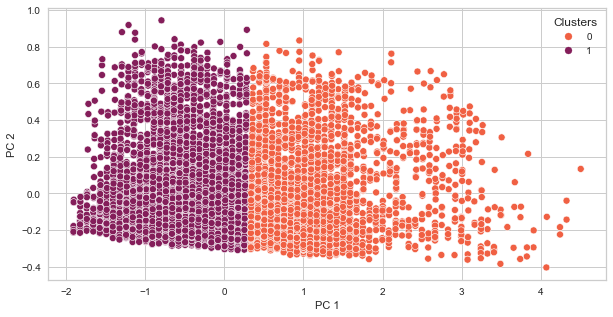

In [57]:
# Visulaizing Clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x='PC 1', y='PC 2', data=reducted_avg_sil, hue='Clusters', palette='rocket_r')

In [58]:
avg_balanced[['age','balance','duration','Clusters']].groupby('Clusters').median()

,age,balance,duration
Clusters,,,
0,53.0,718.0,238.0
1,34.0,533.0,243.0


In [59]:
avg_balanced['Clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "Clusters", "Clusters": "total_customer"})

,Clusters,total_customer
0,1,5416
1,0,2758


Analysis KMeans with silhouette method:
- Have fewer cluster compared to Elbow method 
- With fewer cluster we can make more general desicion 